In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("../data/flights.csv")
df.head()

,rownames,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [27]:
df.shape

(336776, 20)

In [28]:
df.isnull().values.any()

np.True_

In [29]:
df.isnull().sum()

rownames             0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [31]:
df2 = df.dropna()
df2.drop(columns = ['rownames'], inplace = True)

/tmp/ipykernel_5964/4008979873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns = ['rownames'], inplace = True)


In [32]:
df2["origin"] = df2["origin"].replace(["EWR", "JFK", "LGA"], ["Newark", "John F. Kennedy", "LaGuardia"])

/tmp/ipykernel_5964/3961264518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["origin"] = df2["origin"].replace(["EWR", "JFK", "LGA"], ["Newark", "John F. Kennedy", "LaGuardia"])


In [ ]:
df2.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,Newark,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LaGuardia,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,John F. Kennedy,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,John F. Kennedy,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LaGuardia,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [35]:
year_map = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}

In [40]:
df2['month name'] = df2['month'].map(year_map)

/tmp/ipykernel_5964/2600180301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month name'] = df2['month'].map(year_map)


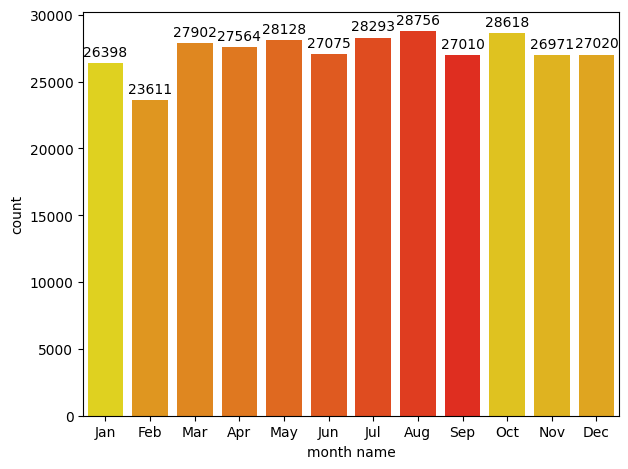

In [92]:

plot = sns.countplot(x = 'month name', data = df2, order= year_map.values(), hue = 'month name',palette='autumn_r')
for p in plot.patches:  
    plot.annotate(format(int(p.get_height())),   
                   (p.get_x() + p.get_width() / 2., p.get_height()),   
                   ha='center', va='baseline',   
                   fontsize=10, color='black',   
                   xytext=(0, 5),  # 5 points vertical offset  
                   textcoords='offset points') 
plt.tight_layout()


In [98]:
df2['date'] = pd.to_datetime(df[['year','month','day']])

/tmp/ipykernel_5964/1961998029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df[['year','month','day']])


/tmp/ipykernel_5964/1127247269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day_of_week'] = df2['date'].dt.dayofweek.apply(


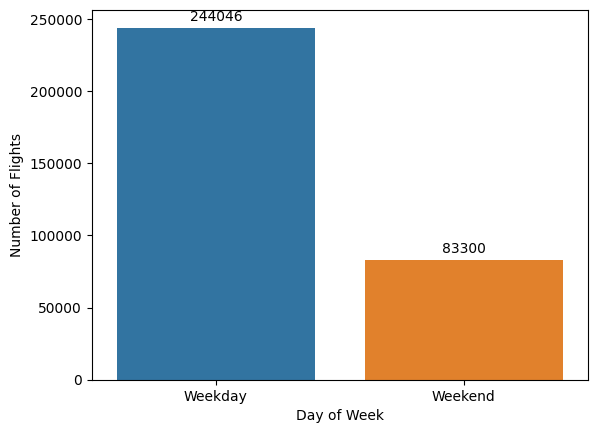

In [103]:
df2['day_of_week'] = df2['date'].dt.dayofweek.apply(
    lambda x:   "Weekday" if x < 5 else "Weekend"
)


plot = sns.countplot(x="day_of_week", data=df2, hue = "day_of_week")

for p in plot.patches:  
    plot.annotate(format(int(p.get_height())),   
                   (p.get_x() + p.get_width() / 2., p.get_height()),   
                   ha='center', va='baseline',   
                   fontsize=10, color='black',   
                   xytext=(0, 5),  # 5 points vertical offset  
                   textcoords='offset points') 
    
plt.xlabel("Day of Week")
plt.ylabel("Number of Flights")
plt.show()